1. Selling Price Range: ₹5000 - ₹760000 (Range: ₹755000)
2. Median Selling Price: ₹45000.0
3. Most Common Seller Type: Individual
4. Bikes Driven Over 50,000 km: 170

5. Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

6. Proportion of Bikes from 2015 or Older: 56.64%

7. Missing Values in Dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

8. Bike with Highest Ex-Showroom Price:
Name: Harley-Davidson Street Bob
Price: ₹1278000.0

9. Bikes by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


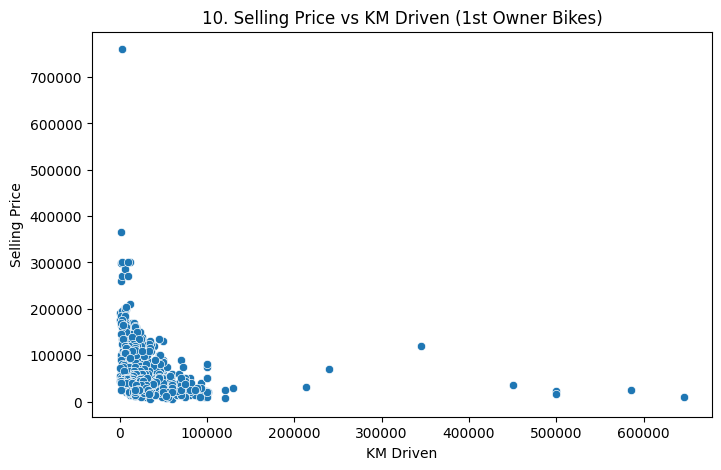


11. Bikes Before Removing Outliers: 1061, After Removing Outliers: 1022


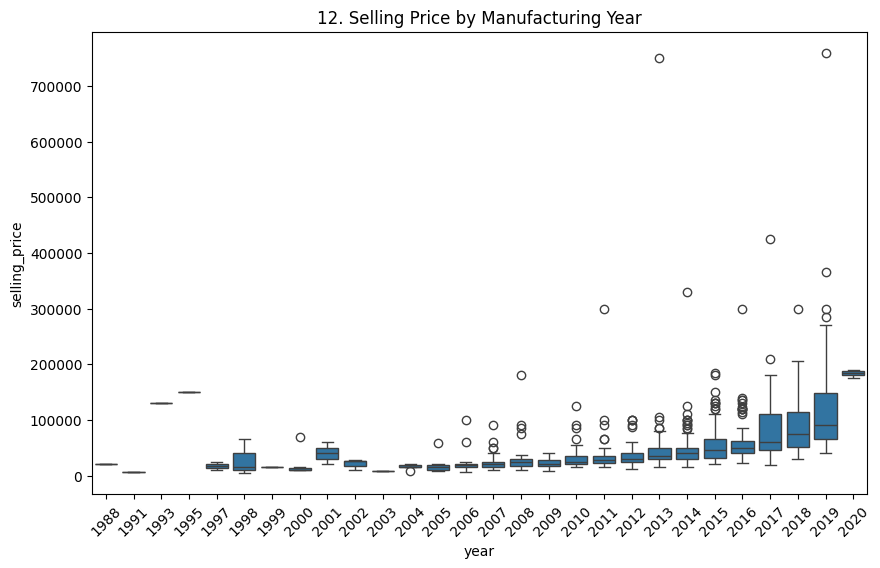


13. Average Depreciation by Age:
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64

14. Premium Priced Bikes (Significantly Above Yearly Avg):
                                     name  year  selling_price
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
52              Royal Enfield Electra 5 S  2010          90000
134            Harley-Davidson Street Bob  2013         750000
137          KTM 390

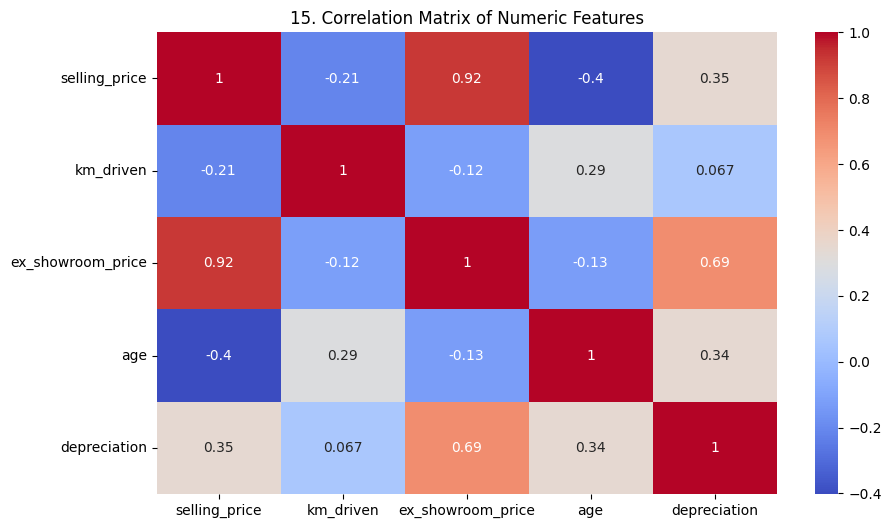

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")
df.columns = df.columns.str.strip()

# Clean 'km_driven'
df['km_driven'] = df['km_driven'].replace({',': ''}, regex=True).astype(float)

# 1. Range of selling prices
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price
print(f"1. Selling Price Range: ₹{min_price} - ₹{max_price} (Range: ₹{price_range})")

# 2. Median selling price
median_price = df['selling_price'].median()
print(f"2. Median Selling Price: ₹{median_price}")

# 3. Most common seller type
most_common_seller = df['seller_type'].mode()[0]
print(f"3. Most Common Seller Type: {most_common_seller}")

# 4. Bikes with more than 50,000 km
bikes_over_50k = (df['km_driven'] > 50000).sum()
print(f"4. Bikes Driven Over 50,000 km: {bikes_over_50k}")

# 5. Average km_driven by ownership type
avg_km_owner = df.groupby('owner')['km_driven'].mean()
print("\n5. Average km_driven by Ownership Type:")
print(avg_km_owner)

# 6. Proportion of bikes from 2015 or earlier
prop_2015_or_older = (df['year'] <= 2015).mean()
print(f"\n6. Proportion of Bikes from 2015 or Older: {prop_2015_or_older:.2%}")

# 7. Missing values trend
missing = df.isnull().sum()
print("\n7. Missing Values in Dataset:")
print(missing)

# 8. Highest ex_showroom_price and corresponding bike
max_ex_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print(f"\n8. Bike with Highest Ex-Showroom Price:\nName: {max_ex_price_row['name']}\nPrice: ₹{max_ex_price_row['ex_showroom_price']}")

# 9. Total bikes listed by each seller type
seller_counts = df['seller_type'].value_counts()
print("\n9. Bikes by Seller Type:")
print(seller_counts)

# 10. Relationship between selling_price and km_driven for first-owner bikes
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df['owner'].str.contains("1st", case=False)], x='km_driven', y='selling_price')
plt.title("10. Selling Price vs KM Driven (1st Owner Bikes)")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

# 11. Remove outliers in km_driven using IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print(f"\n11. Bikes Before Removing Outliers: {len(df)}, After Removing Outliers: {len(df_no_outliers)}")

# 12. Bivariate analysis: year vs selling_price
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title("12. Selling Price by Manufacturing Year")
plt.xticks(rotation=45)
plt.show()

# 13. Average depreciation by bike age
current_year = datetime.now().year
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation = df.groupby('age')['depreciation'].mean()
print("\n13. Average Depreciation by Age:")
print(avg_depreciation)

# 14. Bikes priced significantly above average for their year
stats_by_year = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
df = df.merge(stats_by_year, on='year')
df['is_premium'] = df['selling_price'] > (df['mean'] + 2 * df['std'])
premium_bikes = df[df['is_premium']][['name', 'year', 'selling_price']]
print("\n14. Premium Priced Bikes (Significantly Above Yearly Avg):")
print(premium_bikes)

# 15. Correlation matrix and heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['selling_price', 'km_driven', 'ex_showroom_price', 'age', 'depreciation']].corr(), annot=True, cmap="coolwarm")
plt.title("15. Correlation Matrix of Numeric Features")
plt.show()



1. Average Price by Dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56205

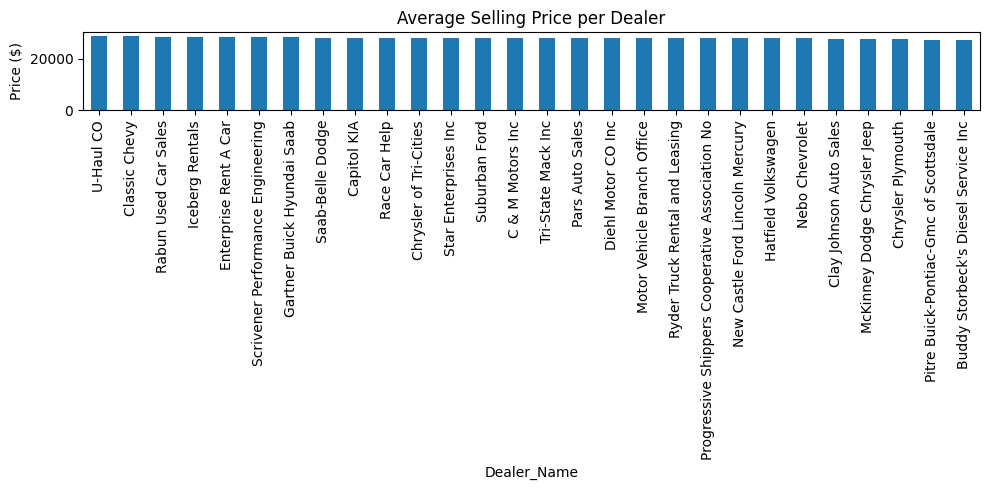


2. Brand with Highest Price Variation:
 Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


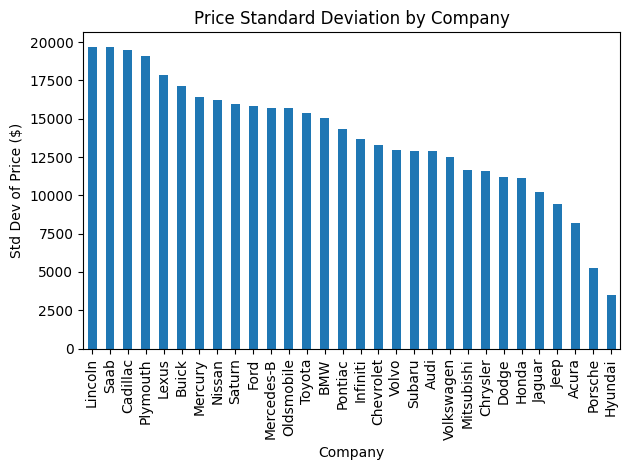

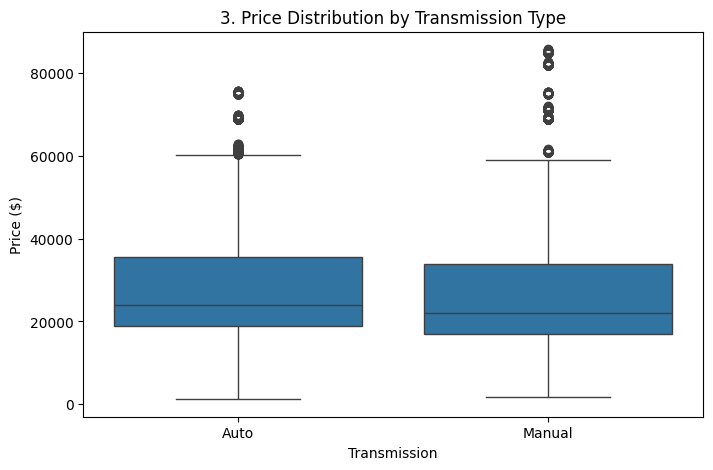

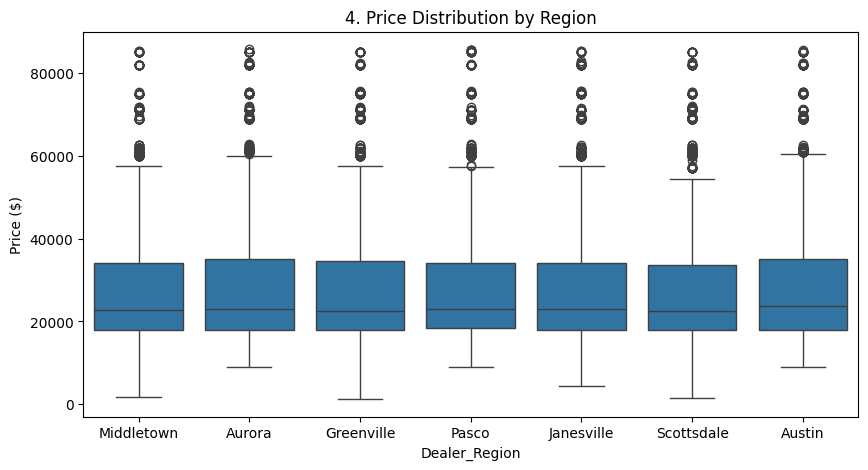

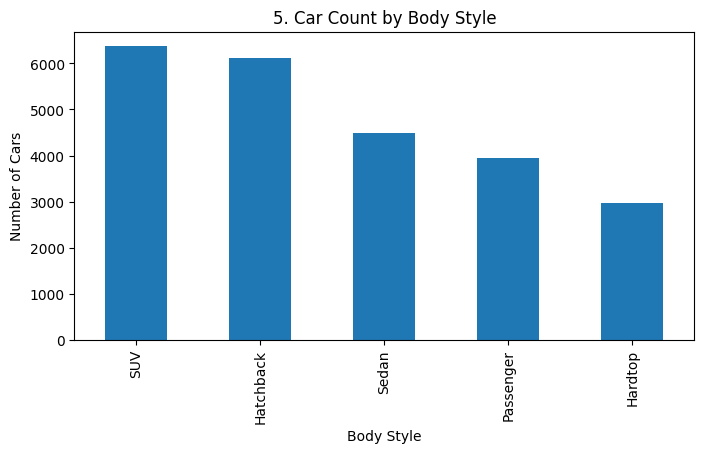


6. Avg Price & Income by Gender:
            Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207

7. Region Price and Sales Count:
                        mean  count
Dealer_Region                     
Aurora         28334.626837   3130
Austin         28341.603628   4135
Greenville     28180.819054   3128
Janesville     27833.350955   3821
Middletown     27856.338875   3128
Pasco          28119.039923   3131
Scottsdale     27954.958928   3433

8. Avg Price by Engine:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


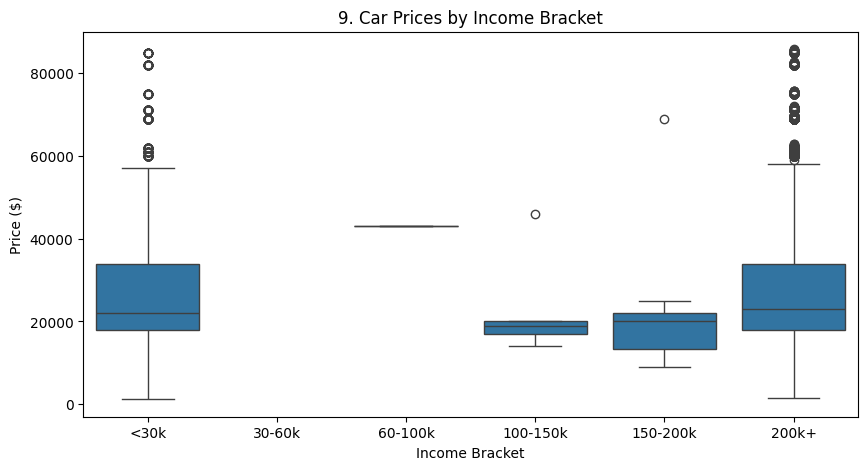

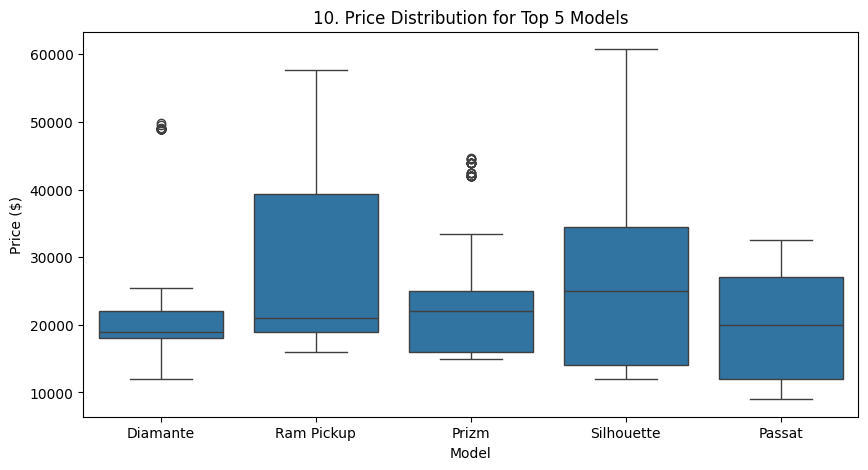

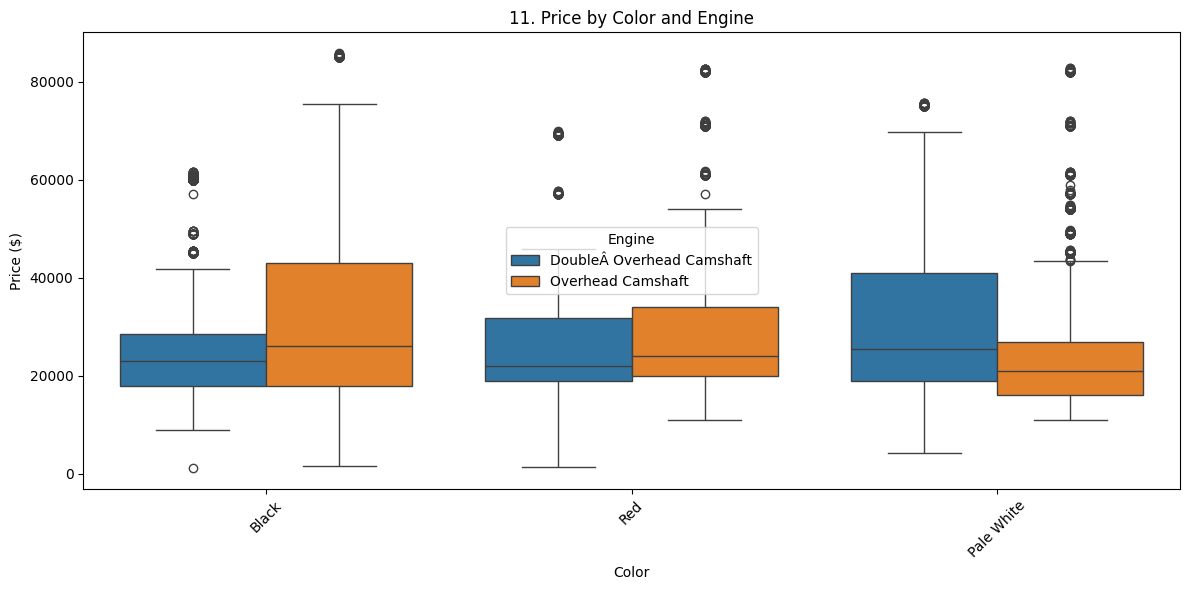

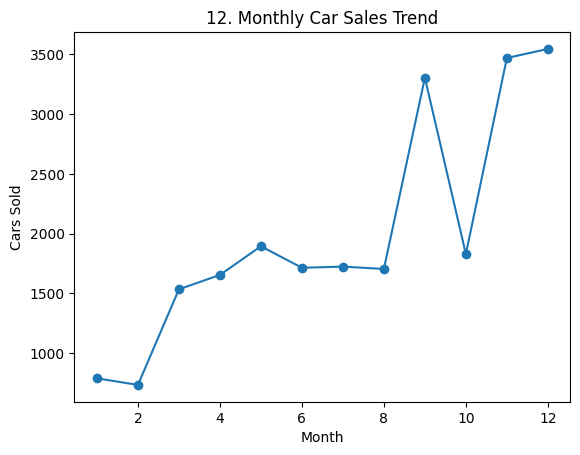

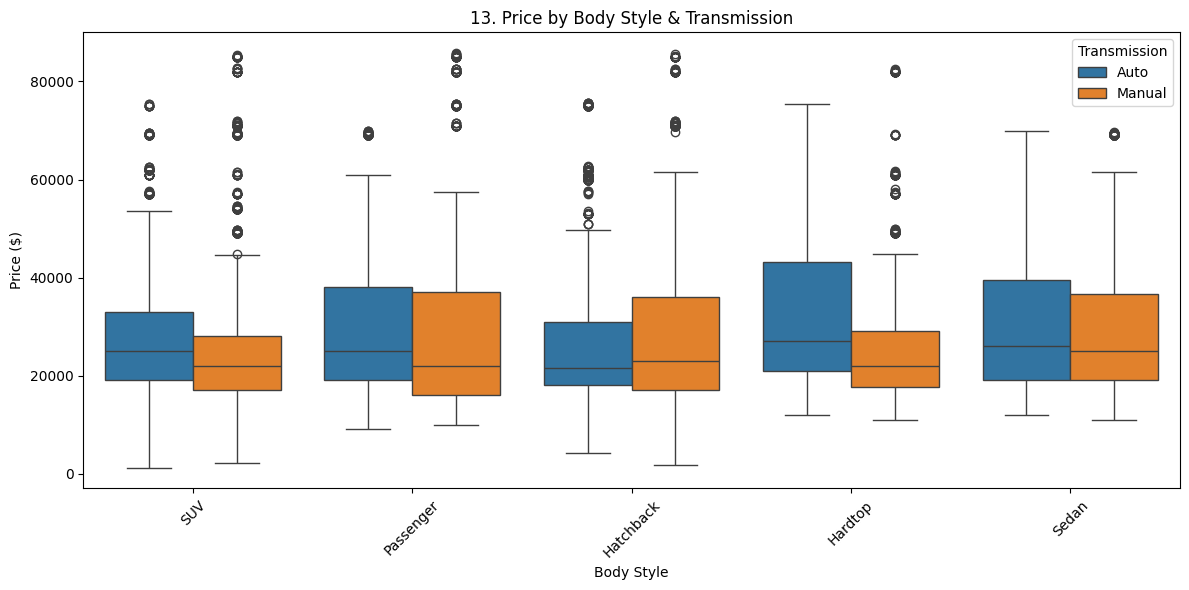

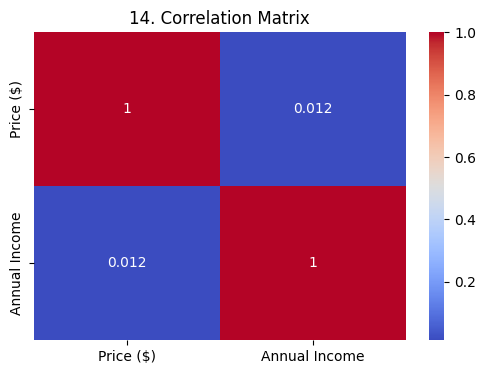


15. Avg Price by Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117           0.000000
3000GT                 22764.326923       21770.659864
300M                   21394.888889           0.000000
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Car Sale.csv")
df.columns = df.columns.str.strip()

# Convert columns
df['Date'] = pd.to_datetime(df['Date'])
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# -----------------------------
# 1. Average price by dealer
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("\n1. Average Price by Dealer:\n", dealer_avg_price)

plt.figure(figsize=(10,5))
dealer_avg_price.plot(kind='bar', title="Average Selling Price per Dealer")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Company with highest price variation
variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("\n2. Brand with Highest Price Variation:\n", variation.head(1))
variation.plot(kind='bar', title="Price Standard Deviation by Company")
plt.ylabel("Std Dev of Price ($)")
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Price distribution by transmission
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("3. Price Distribution by Transmission Type")
plt.show()

# -----------------------------
# 4. Price distribution across regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("4. Price Distribution by Region")
plt.show()

# -----------------------------
# 5. Distribution by body style
plt.figure(figsize=(8, 4))
df['Body Style'].value_counts().plot(kind='bar', title="5. Car Count by Body Style")
plt.ylabel("Number of Cars")
plt.show()

# -----------------------------
# 6. Avg price by gender and income
gender_income_price = df.groupby('Gender')[['Price ($)', 'Annual Income']].mean()
print("\n6. Avg Price & Income by Gender:\n", gender_income_price)

# -----------------------------
# 7. Region-wise price and sales count
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])
print("\n7. Region Price and Sales Count:\n", region_stats)

# -----------------------------
# 8. Avg price by engine
engine_price = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("\n8. Avg Price by Engine:\n", engine_price)

# -----------------------------
# 9. Income brackets vs price
bins = [0, 30000, 60000, 100000, 150000, 200000, df['Annual Income'].max()]
labels = ['<30k', '30-60k', '60-100k', '100-150k', '150-200k', '200k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title("9. Car Prices by Income Bracket")
plt.show()

# -----------------------------
# 10. Top 5 most sold models and price distributions
top_models = df['Model'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 5))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title("10. Price Distribution for Top 5 Models")
plt.show()

# -----------------------------
# 11. Price variation by color and engine size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)
plt.title("11. Price by Color and Engine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 12. Seasonality in sales
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month').size()
monthly_sales.plot(kind='line', marker='o', title="12. Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Cars Sold")
plt.show()

# -----------------------------
# 13. Price distribution by body style and transmission
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("13. Price by Body Style & Transmission")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 14. Correlation matrix for numeric features
corr_data = df[['Price ($)', 'Annual Income']].copy()
corr_matrix = corr_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("14. Correlation Matrix")
plt.show()

# -----------------------------
# 15. Avg price by model and engine
model_engine_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack().fillna(0)
print("\n15. Avg Price by Model and Engine Type:\n", model_engine_price)



1. Average Rating by Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|

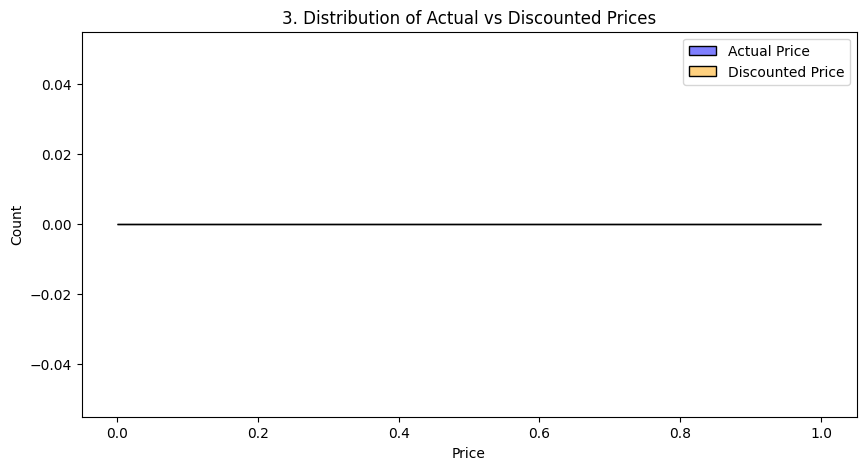


4. Avg Discount Percentage by Category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper               

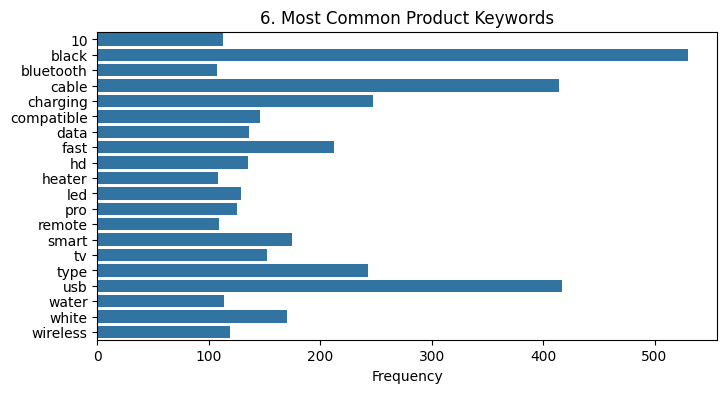


7. Most Reviewed Products:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                     5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                              4
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                                                                        3
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                      3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                            

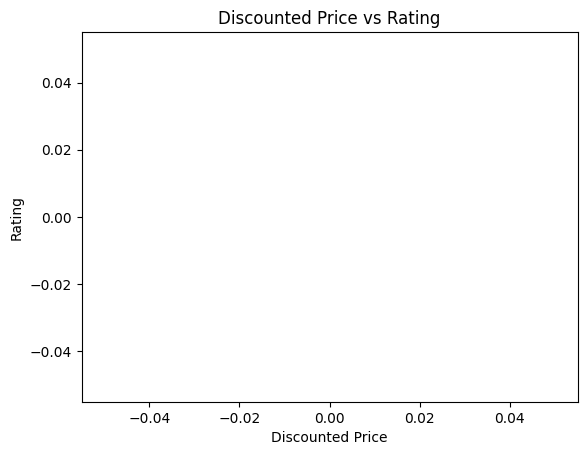


9. Top 5 Categories by Average Rating:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64

10. Suggestions for Optimization:
- Higher prices might be correlated with better ratings; explore premium positioning.
- Number of low-rated products (<3 stars): 6
- Consider improving descriptions or product quality for products with high discount but low ratings.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv("/content/amazon.csv")
df.columns = df.columns.str.strip()

# Convert numeric columns to appropriate types
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

# --------------------------------------------
# 1. Average rating for each product category
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\n1. Average Rating by Category:\n", avg_rating_by_category)

# --------------------------------------------
# 2. Top rating_count products by category
top_rating_products = df.sort_values('rating_count', ascending=False).groupby('category').head(3)
print("\n2. Top Rating Count Products by Category:\n", top_rating_products[['category', 'product_name', 'rating_count']])

# --------------------------------------------
# 3. Distribution of discounted vs. actual prices
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], label='Actual Price', color='blue', kde=True)
sns.histplot(df['discounted_price'], label='Discounted Price', color='orange', kde=True)
plt.legend()
plt.title("3. Distribution of Actual vs Discounted Prices")
plt.xlabel("Price")
plt.show()

# --------------------------------------------
# 4. Average discount percentage by category
avg_discount_by_cat = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\n4. Avg Discount Percentage by Category:\n", avg_discount_by_cat)

# --------------------------------------------
# 5. Most popular product names
popular_products = df['product_name'].value_counts().head(10)
print("\n5. Most Popular Product Names:\n", popular_products)

# --------------------------------------------
# 6. Most popular product keywords
text = ' '.join(df['product_name'].dropna().astype(str).values)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_freq = vectorizer.fit_transform([text])
words = vectorizer.get_feature_names_out()
frequencies = word_freq.toarray()[0]

plt.figure(figsize=(8, 4))
sns.barplot(x=frequencies, y=words)
plt.title("6. Most Common Product Keywords")
plt.xlabel("Frequency")
plt.show()

# --------------------------------------------
# 7. Most popular product reviews (based on frequency of product_name in review_content)
df['review_content'] = df['review_content'].astype(str)
popular_reviews = df.groupby('product_name')['review_content'].count().sort_values(ascending=False).head(10)
print("\n7. Most Reviewed Products:\n", popular_reviews)

# --------------------------------------------
# 8. Correlation between discounted_price and rating
corr = df[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"\n8. Correlation between Discounted Price and Rating: {corr:.2f}")

sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title("Discounted Price vs Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.show()

# --------------------------------------------
# 9. Top 5 categories based on highest ratings
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("\n9. Top 5 Categories by Average Rating:\n", top_categories)

# --------------------------------------------
# 10. Optimization Suggestions (basic data-driven insights)
print("\n10. Suggestions for Optimization:")
if corr < 0:
    print("- Discounting too heavily may be linked with lower-rated products.")
else:
    print("- Higher prices might be correlated with better ratings; explore premium positioning.")

low_rating = df[df['rating'] < 3]
print(f"- Number of low-rated products (<3 stars): {len(low_rating)}")
print("- Consider improving descriptions or product quality for products with high discount but low ratings.")


Null values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27


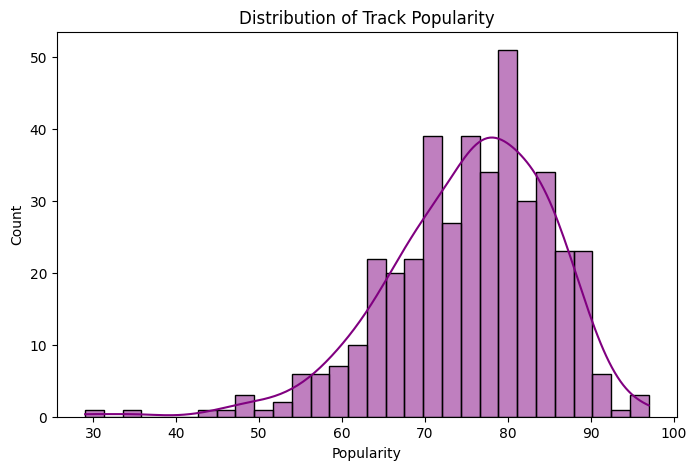

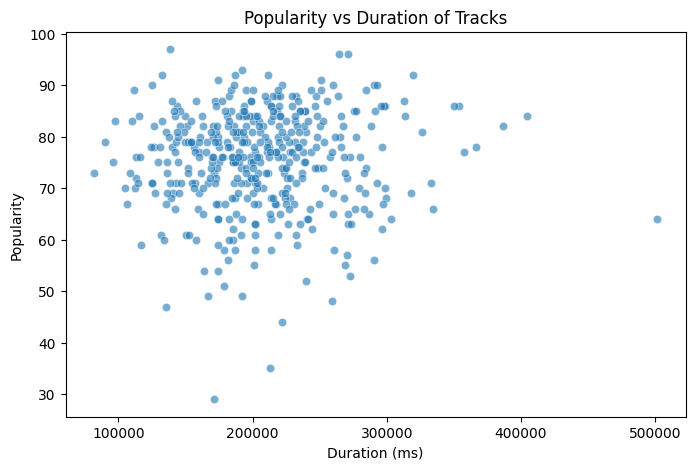

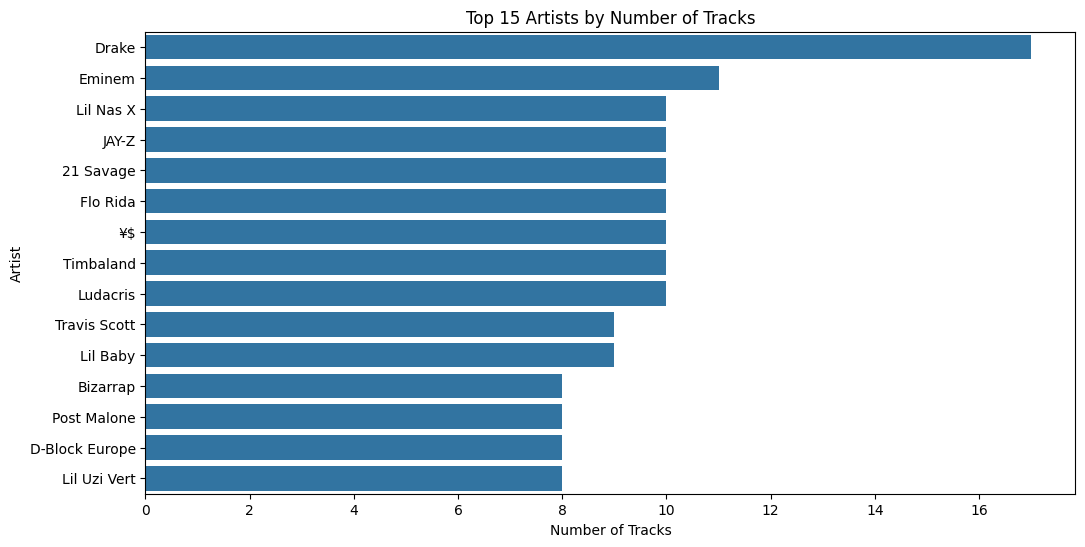


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Average Popularity of Top 5 Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Most Popular Track for Each of Top 5 Artists:
                                         Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              

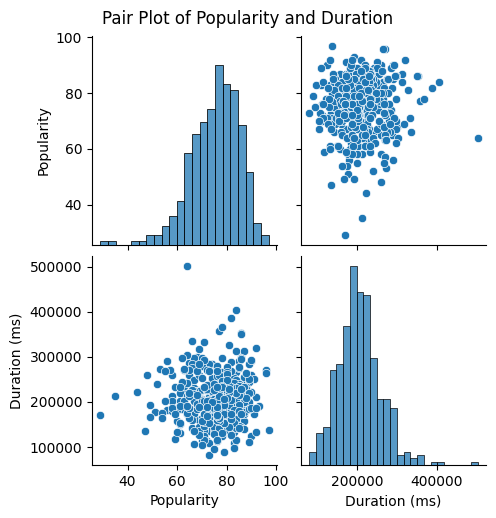

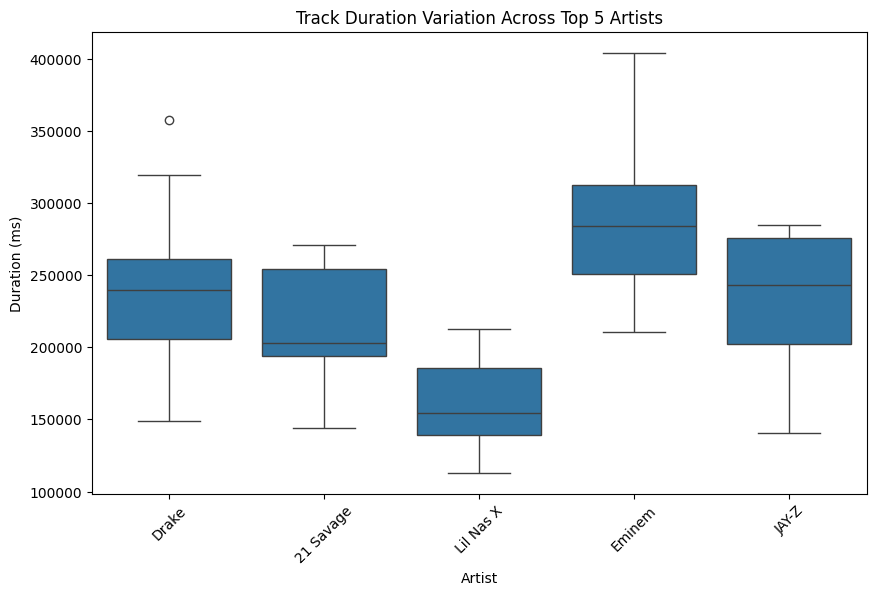

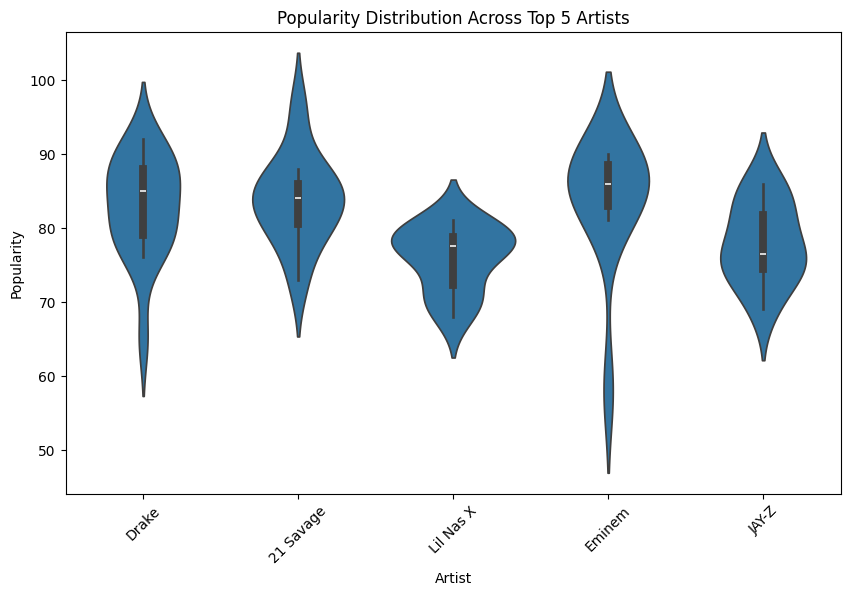

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/spotify.csv")

# 1. Check for null values and handle them
print("Null values per column:\n", df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with any null values

# 2. Check and handle duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 3. Distribution of popularity - histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='purple')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

# 4. Relationship between popularity and duration - scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

# 5. Artist with the highest number of tracks - countplot
plt.figure(figsize=(12,6))
top_artists = df['Artist'].value_counts().head(15).index
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists)], order=top_artists)
plt.title("Top 15 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

# 6. Top 5 least popular tracks with artist and track name
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:\n", least_popular)

# 7. Top 5 most popular artists by track count
top5_artists = df['Artist'].value_counts().head(5).index

# 8. Among top 5 artists, artist with highest average popularity
avg_popularity = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity of Top 5 Artists:\n", avg_popularity)

# 9. For the top 5 artists, their most popular tracks
most_popular_tracks = df[df['Artist'].isin(top5_artists)].sort_values(['Artist', 'Popularity'], ascending=[True, False])
top_tracks_per_artist = most_popular_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]
print("\nMost Popular Track for Each of Top 5 Artists:\n", top_tracks_per_artist)

# 10. Pair plot of numerical variables
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Popularity and Duration", y=1.02)
plt.show()

# 11. Duration variation across artists - boxplot for top 5 artists for clarity
plt.figure(figsize=(10,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top5_artists)])
plt.title("Track Duration Variation Across Top 5 Artists")
plt.xticks(rotation=45)
plt.show()

# 12. Popularity distribution for different artists - violin plot for top 5 artists
plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top5_artists)])
plt.title("Popularity Distribution Across Top 5 Artists")
plt.xticks(rotation=45)
plt.show()
